In [1]:
import sys

import numpy as np

import cv2
!pip install opencv-python

In [2]:

# 입력 영상 불러오기

filename = 'space_shuttle.jpg'

#입력영상 불러오기

if len(sys.argv) > 1:

    filename = sys.argv[1]


In [5]:
#명령인자로 파일이름은 따로줄수있게끔. 

img = cv2.imread('space_shuttle.jpg')

if img is None:

    print('Image load failed!')

    sys.exit()

# Caffe 모델을 불러옵니다.

In [6]:
model = 'googlenet/bvlc_googlenet.caffemodel'

config = 'googlenet/deploy.prototxt'


In [7]:
# ONNX 모델이름

#model = 'googlenet/inception-v1-9.onnx'

#config = ''


In [8]:
net = cv2.dnn.readNet(model, config)


if net.empty():

    print('Network load failed!')

    sys.exit()

In [9]:

classNames = None

#다운받은 텍스트파일,

with open('googlenet/classification_classes_ILSVRC2012.txt', 'rt') as f:

    classNames = f.read().rstrip('\n').split('\n')

블럽을 만들어 줍니다. 그리고 Forward를 통해 확률이 리턴됩니다.

In [10]:
# 추론
blob = cv2.dnn.blobFromImage(img, 1, (224, 224), (104, 117, 123))

#입력영상의 크기를 쓰야하는데, 1은 그대로쓰겠다라는 뜻이다. 뒤에는 평균값이다. 

net.setInput(blob)

prob = net.forward()

prob에서 가장큰값이 이쓴 위치를 찾습니다. 그래서 classID변수로 받고, confidence로 확률값을 받습니다.

In [11]:
out = prob.flatten()
classId = np.argmax(out)
confidence = out[classId]

In [12]:
text = f'{classNames[classId]} ({confidence * 100:4.2f}%)'
cv2.putText(img, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 1, cv2.LINE_AA)

array([[[106, 107,  98],
        [ 48,  49,  40],
        [105, 106,  97],
        ...,
        [166, 150, 121],
        [165, 149, 120],
        [165, 149, 120]],

       [[103, 104,  95],
        [ 48,  49,  40],
        [ 98,  99,  90],
        ...,
        [166, 150, 121],
        [165, 149, 120],
        [165, 149, 120]],

       [[ 92,  91,  81],
        [ 49,  48,  38],
        [100,  99,  89],
        ...,
        [166, 150, 121],
        [166, 150, 121],
        [166, 150, 121]],

       ...,

       [[111,  77,  48],
        [112,  78,  49],
        [114,  80,  51],
        ...,
        [109,  77,  48],
        [111,  79,  50],
        [117,  85,  56]],

       [[118,  81,  53],
        [117,  80,  52],
        [115,  81,  52],
        ...,
        [112,  78,  48],
        [117,  83,  53],
        [121,  87,  57]],

       [[107,  70,  42],
        [104,  67,  39],
        [101,  67,  38],
        ...,
        [106,  72,  42],
        [101,  67,  37],
        [ 94,  60,  30]]

In [15]:
cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()


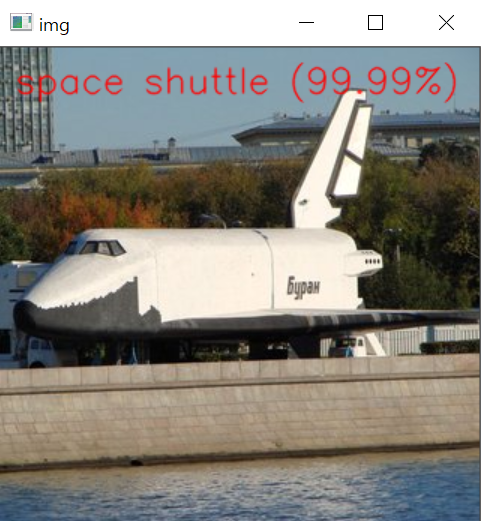

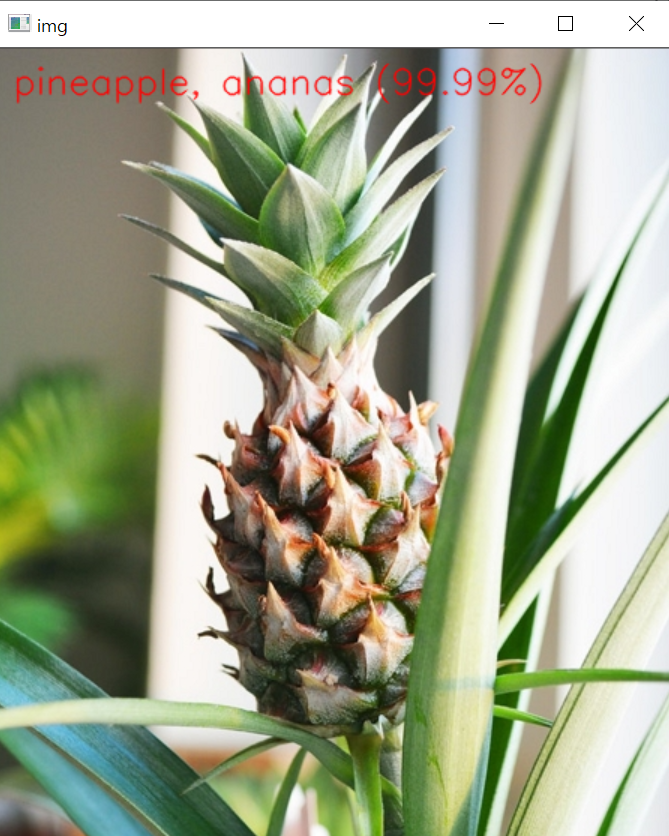